<a href="https://colab.research.google.com/github/vinitakawale/SyntheticAnomalyDetection/blob/main/MLAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dtaidistance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.8 MB/s eta 0:00:00


This ia test comment

In [ ]:
import pandas as pd
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import bz2
import math
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtw_viz
import datetime
from typing import Dict
from Synthetic import SyntheticTS
from autoencoders import Autoencoder
from plot import plot_anomaly

In [ ]:
start_time = '2021-05-01 00:00:00'
end_time = '2021-05-06 06:00:00'
process_time_mins = 15

ts = SyntheticTS(start_time,end_time,process_time_mins)

In [ ]:
ts

Customized synthetic time series class

In [ ]:
print(ts)

Parameters
Start time: 2021-05-01 00:00:00
End time: 2021-05-06 06:00:00 
Process time (minutes): 15
        


In [ ]:
ts.plot_normal()

Nothing initialized


In [ ]:
ts.plot_anomaly()

Nothing anomalized


In [ ]:
df=ts.normal_process(loc=100,scale=5)
df.head()

,time,normal_data
0,2021-05-01 00:00:00,104.206622
1,2021-05-01 00:15:00,95.986974
2,2021-05-01 00:30:00,101.391274
3,2021-05-01 00:45:00,98.482037
4,2021-05-01 01:00:00,104.069656


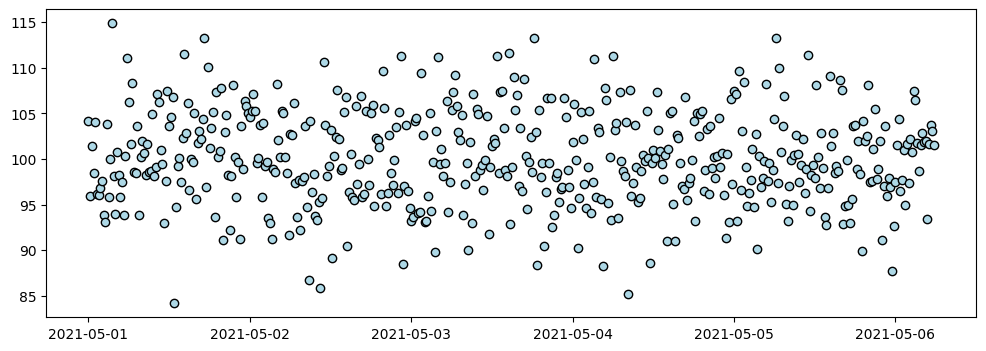

In [ ]:
ts.plot_normal()

In [ ]:
df2 = ts.anomalize()
df2.head()

,time,anomaly_data
0,2021-05-01 00:00:00,104.206622
1,2021-05-01 00:15:00,95.986974
2,2021-05-01 00:30:00,101.391274
3,2021-05-01 00:45:00,98.482037
4,2021-05-01 01:00:00,104.069656


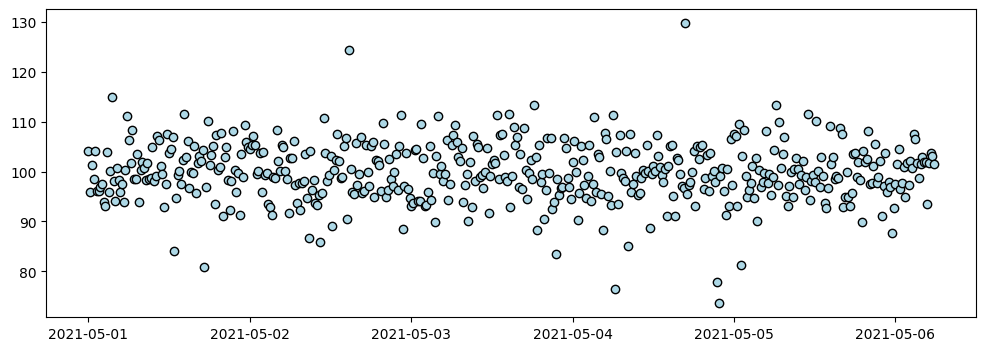

In [ ]:
ts.plot_anomaly()

In [ ]:
df_normal = pd.DataFrame({"timestamp": df["time"], "value":df["normal_data"]})
df_anomaly = pd.DataFrame({"timestamp": df2["time"], "value":df2["anomaly_data"]})


# Autoencoders

In [ ]:
anomaly_scores_normal = Autoencoder(df_normal)
anomaly_scores_anomaly = Autoencoder(df_anomaly)

Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 3153.8386
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 2718.9976
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 2321.3157
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 1958.5166
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 1634.0948
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 1346.3428
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 1092.8110
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 874.1154
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 686.6050
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 535.1448
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 415.2630
Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 316.0949
Epoch 13/50
16/16 

In [ ]:
threshold_normal = anomaly_scores_normal.quantile(0.99)
anomalous_normal = anomaly_scores_normal > threshold_normal
binary_labels = anomalous_normal.astype(int)
precision, recall,f1_score, _ = precision_recall_fscore_support(
        anomalous_normal, anomalous_normal, average='binary')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)

Precision:  1.0
Recall:  1.0
F1 Score:  1.0


In [ ]:
threshold_anomaly = anomaly_scores_anomaly.quantile(0.99)
anomalous_anomaly = anomaly_scores_anomaly > threshold_anomaly
binary_labels = anomalous_normal.astype(int)
precision, recall,f1_score, _ = precision_recall_fscore_support(
        anomalous_normal, anomalous_normal, average='binary')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)

Precision:  1.0
Recall:  1.0
F1 Score:  1.0


In [ ]:
test_normal = df_normal['value'].values
predictions_normal = anomaly_scores_normal.values
print("Test: ", test_normal)
print("Predictions: ", predictions_normal)

Test:  [104.20662184  95.98697357 101.39127358  98.48203675 104.06965615
  96.16393805  96.05058216  96.815693    97.58557296  93.81669187
  93.08613147 103.88389448  95.85924482 100.00318839 114.88058068
  98.08491135  94.00764161 100.71470824  98.22852179  95.87358154
  97.43210244  93.82787819 100.27035761 111.05448197 106.24586256
 101.61098943 108.3196734   98.53405047  98.45726985 103.56836499
  93.90433253 100.2634742  101.93673224 100.66094063  98.2646512
 101.66183919  98.54593554  98.63689321 104.90357974  98.15897937
  99.14695233 107.13205087 106.25765954 101.01184796  99.46693103
  92.9581085   97.58969258 107.45014243 103.6156688  104.60459744
 106.8172194   84.17074847  94.68059617  99.20555075 100.11080332
  97.42890136 102.2895924  111.5247967  102.83285623 106.18470329
  96.61204393  99.99520258  99.65763161 105.02410138  95.63444972
 101.70263876 103.07571893 102.15808011 104.33702833 113.247376
  96.95372114 110.10629964 101.21995678 103.34184778 105.19286384
  93.5

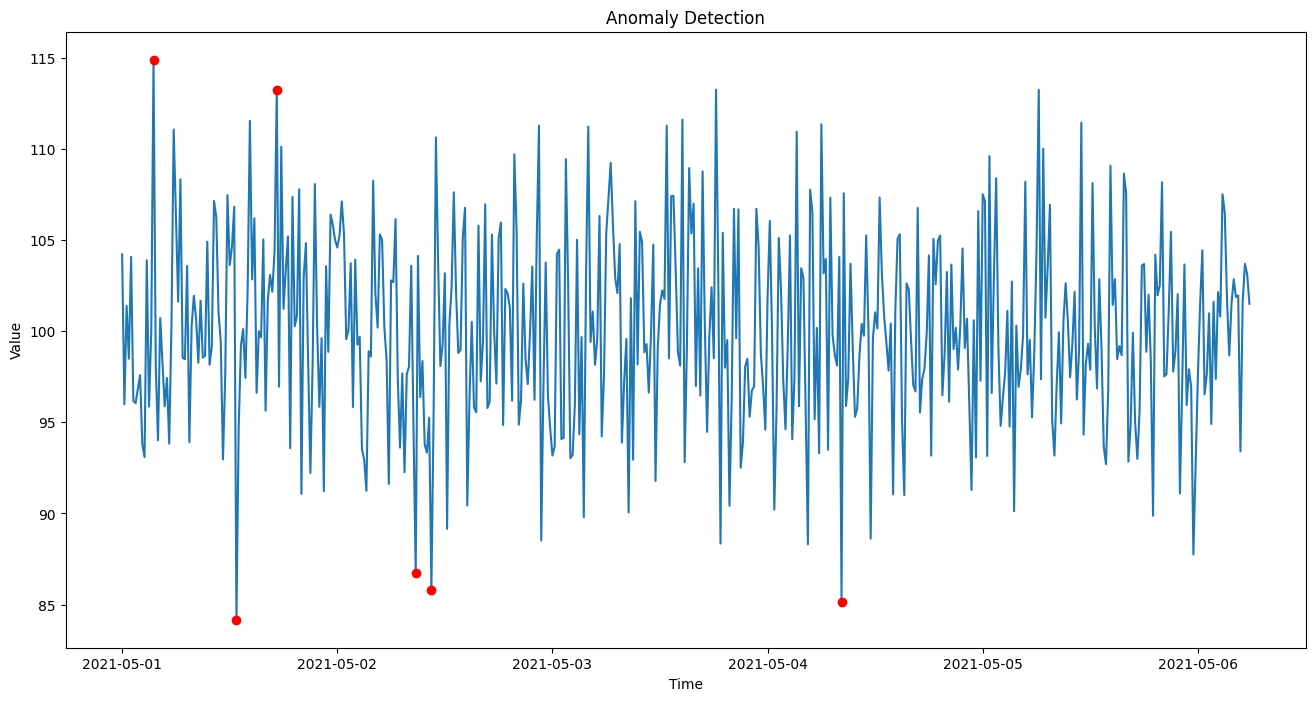

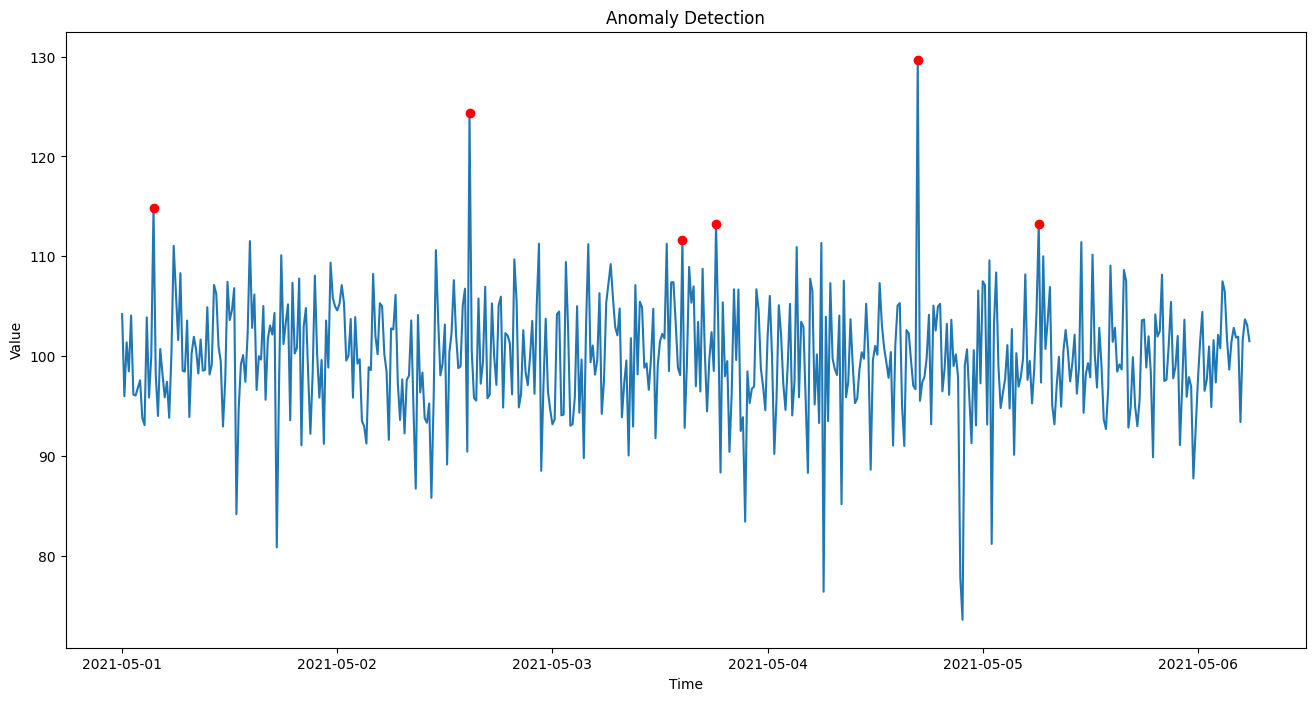

In [ ]:
omplot_anomaly(df_normal, anomalous_normal)
plot_anomaly(df_anomaly, anomalous_anomaly)

# # Plot the data with anomalies marked in red
# plt.figure(figsize=(16, 8))
# plt.plot(data_converted['timestamp'],
#          data_converted['value'])
# plt.plot(data_converted['timestamp'][anomalous],
#          data_converted['value'][anomalous], 'ro')
# plt.title('Anomaly Detection')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.show()
